# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
from scipy import stats
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Create endpoint URL
city_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | saladan
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ouani
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | goynuk
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | fort morgan
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | zierikzee
Processing Record 17 of Set 1 | manta
Processing Record 18 of Set 1 | darhan
Processing Record 19 of Set 1 | chingola
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | tsiroanomandidy


In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ["City", 
                                                  "Lat", 
                                                  "Lng", 
                                                  "Max Temp", 
                                                  "Humidity", 
                                                  "Cloudiness", 
                                                  "Wind Speed", 
                                                  "Country", 
                                                  "Date"])

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,45.81,72,0,1.66,GL,1722653259
1,olonkinbyen,70.9221,-8.7187,42.19,92,100,9.19,SJ,1722653304
2,wailua homesteads,22.0669,-159.3780,81.39,73,0,10.36,US,1722653261
3,puerto natales,-51.7236,-72.4875,35.02,99,100,1.10,CL,1722653306
4,saladan,7.6134,99.0365,84.09,70,97,0.43,TH,1722653308


In [223]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [224]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#Get the timestamp for when the data was pulled and convert to MST datetime
timestamp = datetime.datetime.fromtimestamp(1722653259-25200).strftime("%Y-%m-%d")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,45.81,72,0,1.66,GL,1722653259
1,olonkinbyen,70.9221,-8.7187,42.19,92,100,9.19,SJ,1722653304
2,wailua homesteads,22.0669,-159.3780,81.39,73,0,10.36,US,1722653261
3,puerto natales,-51.7236,-72.4875,35.02,99,100,1.10,CL,1722653306
4,saladan,7.6134,99.0365,84.09,70,97,0.43,TH,1722653308


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

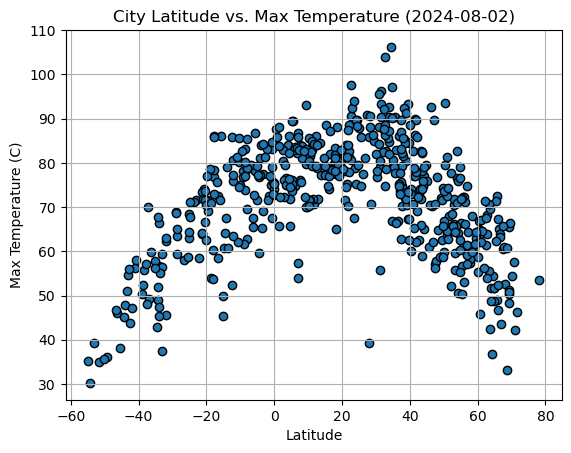

In [225]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
maxtemp = city_data_df["Max Temp"]
fig1_lat_mtemp = plt.scatter(latitude, maxtemp, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({timestamp})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

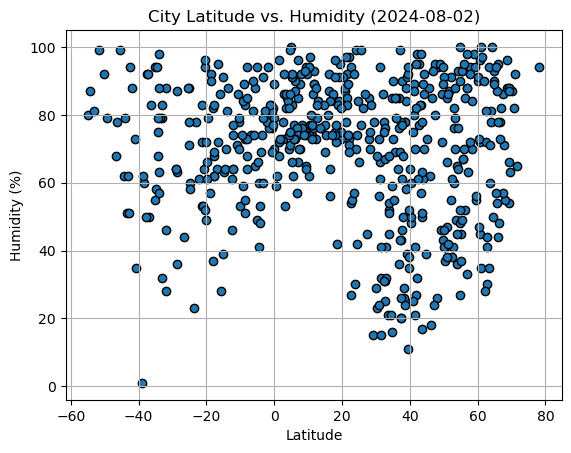

In [226]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
fig2_lat_hum = plt.scatter(latitude, humidity, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({timestamp})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

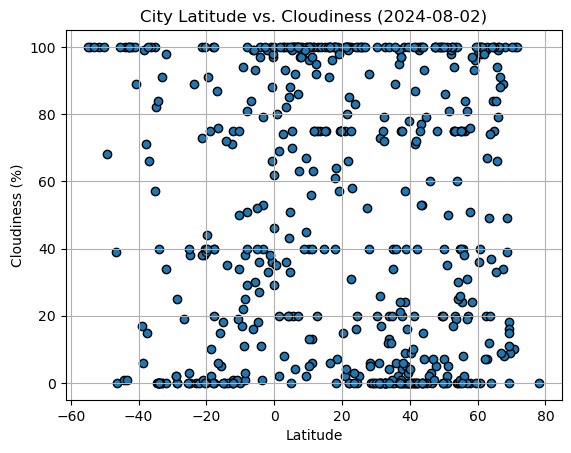

In [227]:
# Build the scatter plots for latitude vs. cloudiness
cloud = city_data_df["Cloudiness"]
fig3_lat_cloud = plt.scatter(latitude, cloud, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({timestamp})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

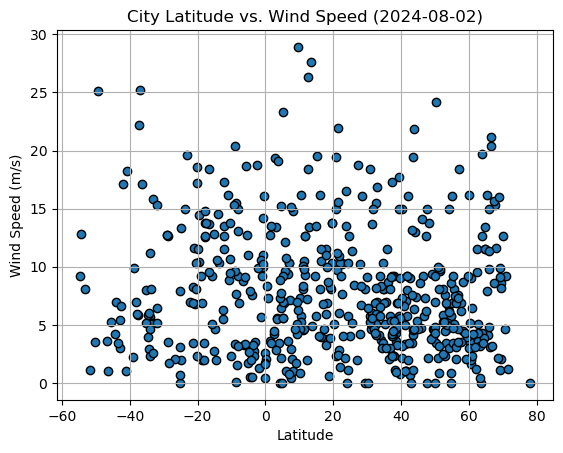

In [228]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]
fig3_lat_wind = plt.scatter(latitude, wind, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({timestamp})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [229]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y):
    
    # Perform a linear regression on x and y variables
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    # Get regression values
    regress_values = x * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    return (line_eq)

In [230]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,45.81,72,0,1.66,GL,1722653259
1,olonkinbyen,70.9221,-8.7187,42.19,92,100,9.19,SJ,1722653304
2,wailua homesteads,22.0669,-159.3780,81.39,73,0,10.36,US,1722653261
4,saladan,7.6134,99.0365,84.09,70,97,0.43,TH,1722653308
8,goynuk,40.4003,30.7883,59.97,48,0,2.15,TR,1722653313


In [231]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,35.02,99,100,1.10,CL,1722653306
5,port-aux-francais,-49.3500,70.2167,36.00,79,68,25.10,TF,1722653309
6,ouani,-12.1322,44.4258,75.92,64,1,13.49,KM,1722653310
7,arraial do cabo,-22.9661,-42.0278,71.51,78,0,19.60,BR,1722653311
9,invercargill,-46.4000,168.3500,46.02,78,0,1.01,NZ,1722653270


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.35616836506991423


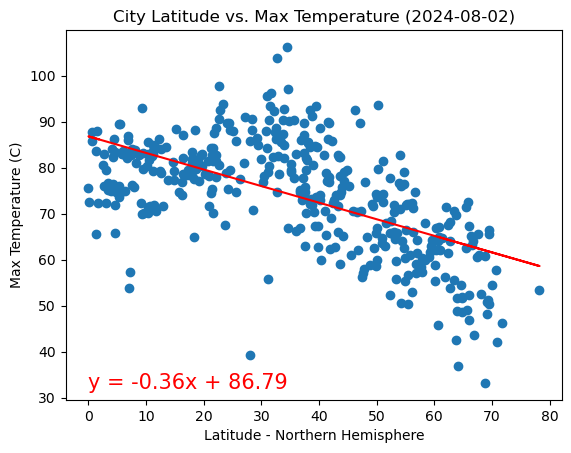

In [232]:
# Linear regression on Northern Hemisphere
lat_north = northern_hemi_df["Lat"]
maxtemp_north = northern_hemi_df["Max Temp"]

#Call to the linear regression plot function
fig5 = linear_regression_plot(lat_north, maxtemp_north)

# Incorporate the other graph properties
plt.xlabel("Latitude - Northern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({timestamp})")
plt.annotate(fig5, (0,32), fontsize = 15, color = "red")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.6327435310004246


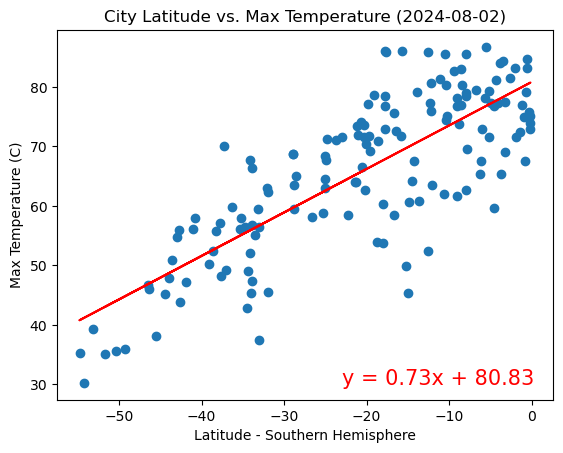

In [233]:
# Linear regression on Southern Hemisphere
lat_south = southern_hemi_df["Lat"]
maxtemp_south = southern_hemi_df["Max Temp"]

#Call to the linear regression plot function
fig6 = linear_regression_plot(lat_south, maxtemp_south)

# Incorporate the other graph properties
plt.xlabel("Latitude - Southern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({timestamp})")
plt.annotate(fig6, (-23,30), fontsize = 15, color = "red")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a moderate positive linear correlation between temperature and latitude in the southern hemisphere with an r-value of ~0.63. There is a weaker positive linear correlation between temperature and latitude in the northern hemisphere with an r-value of ~0.36. In both hemispheres as the latitude approaches 0 the temperature increases, however the southern hemisphere correlation is nearly double the strength of the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0182840644506576


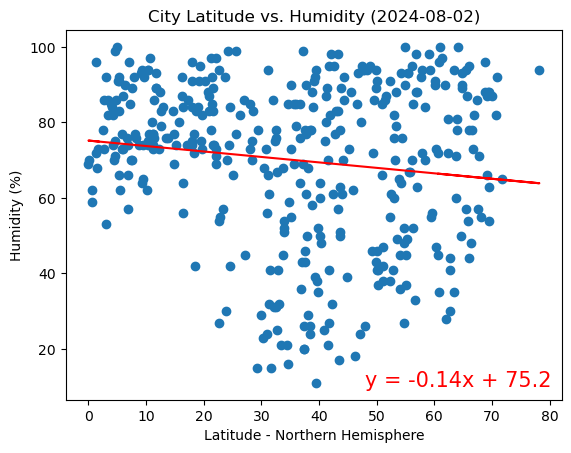

In [234]:
# Northern Hemisphere
humidity_north = northern_hemi_df["Humidity"]

#Call to the linear regression plot function
fig7 = linear_regression_plot(lat_north, humidity_north)

# Incorporate the other graph properties
plt.xlabel("Latitude - Northern Hemisphere")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({timestamp})")
plt.annotate(fig7, (48,10), fontsize = 15, color = "red")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r-value is: 0.0016791384493341673


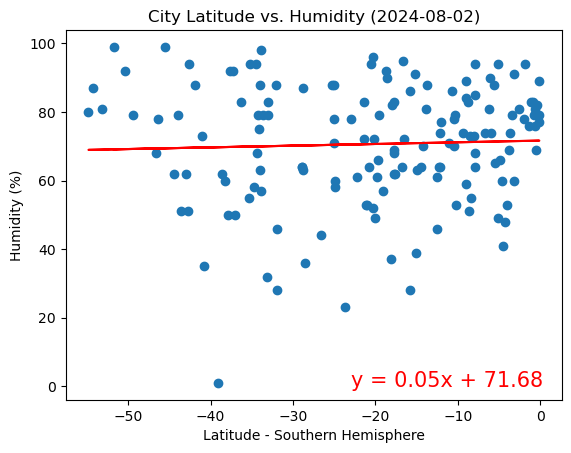

In [235]:
# Southern Hemisphere
humidity_south = southern_hemi_df["Humidity"]

#Call to the linear regression plot function
fig8 = linear_regression_plot(lat_south, humidity_south)

# Incorporate the other graph properties
plt.xlabel("Latitude - Southern Hemisphere")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({timestamp})")
plt.annotate(fig8, (-23,0), fontsize = 15, color = "red")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the northern and southern hemispheres the r-value is ~0.02 and ~0.00 respectively, indicating that there is no correlation between latitude versus humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.020679758189553307


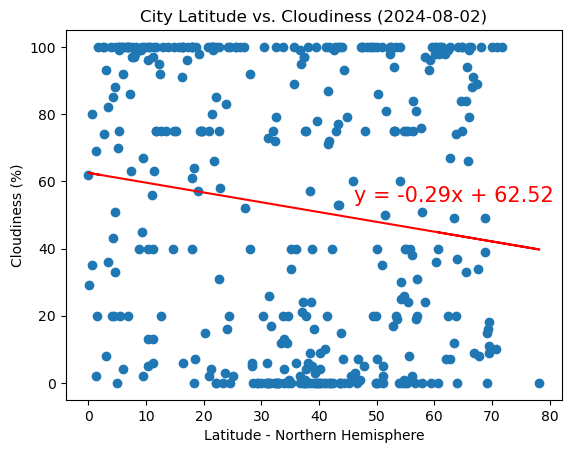

In [236]:
# Northern Hemisphere
cloudy_north = northern_hemi_df["Cloudiness"]

#Call to the linear regression plot function
fig9 = linear_regression_plot(lat_north, cloudy_north)

# Incorporate the other graph properties
plt.xlabel("Latitude - Northern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({timestamp})")
plt.annotate(fig9, (46,54), fontsize = 15, color = "red")

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r-value is: 0.0045942800656674975


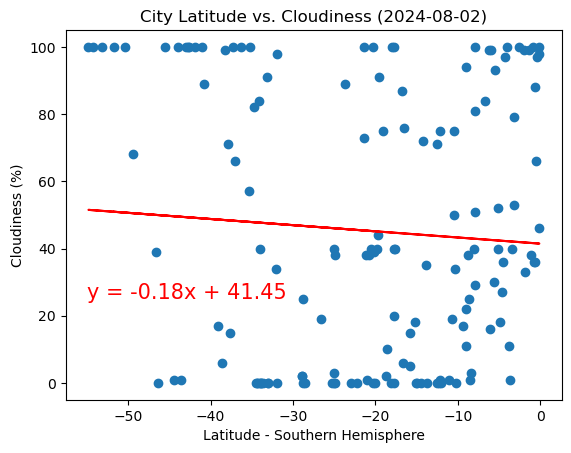

In [237]:
# Southern Hemisphere
cloudy_south = southern_hemi_df["Cloudiness"]

#Call to the linear regression plot function
fig10 = linear_regression_plot(lat_south, cloudy_south)

# Incorporate the other graph properties
plt.xlabel("Latitude - Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({timestamp})")
plt.annotate(fig10, (-55,25), fontsize = 15, color = "red")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the northern and southern hemispheres the r-value is ~0.00 and ~0.01 respectively, indicating that there is no correlation between latitude versus cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009705626961596025


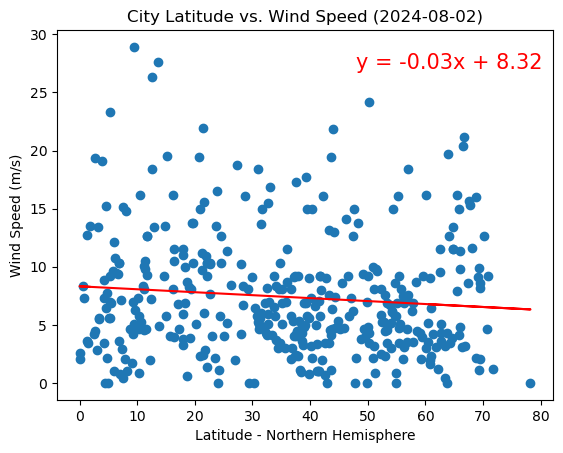

In [238]:
# Northern Hemisphere
wind_north = northern_hemi_df["Wind Speed"]

#Call to the linear regression plot function
fig11 = linear_regression_plot(lat_north, wind_north)

# Incorporate the other graph properties
plt.xlabel("Latitude - Northern Hemisphere")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({timestamp})")
plt.annotate(fig11, (48,27), fontsize = 15, color = "red")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: 0.0001147836885890291


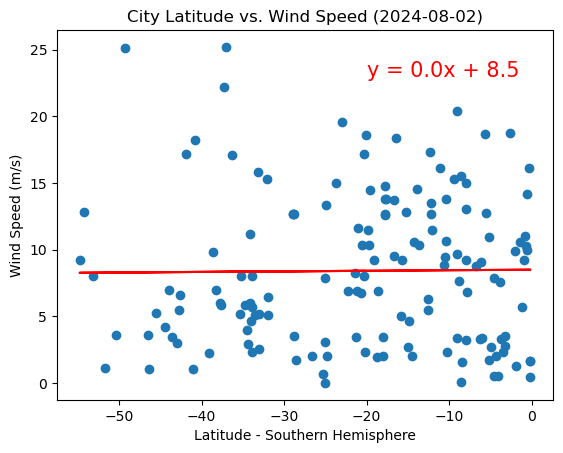

In [239]:
# Southern Hemisphere
wind_south = southern_hemi_df["Wind Speed"]

#Call to the linear regression plot function
fig12 = linear_regression_plot(lat_south, wind_south)

# Incorporate the other graph properties
plt.xlabel("Latitude - Southern Hemisphere")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({timestamp})")
plt.annotate(fig12, (-20,23), fontsize = 15, color = "red")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the northern and southern hemispheres the r-value is ~0.03 and ~0.01 respectively, indicating that there is no correlation between latitude versus wind speed.